In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

current_directory = os.getcwd()
log_file_path = os.path.join(current_directory, 'week_4.log')
logging.basicConfig(filename=log_file_path, level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info('Libraries imported successfully.')

logging.info('Imported libraries are ready for use.')


Data Loading and Initial Exploration

In [7]:

train_data = pd.read_csv('../../doc4/rossmann-store-sales/train.csv')
test_data = pd.read_csv('../../doc4/rossmann-store-sales/test.csv')
store_data = pd.read_csv('../../doc4/rossmann-store-sales/store.csv')

logging.info('Datasets loaded successfully.')

train_merged = pd.merge(train_data, store_data, how='left', on='Store')
test_merged = pd.merge(test_data, store_data, how='left', on='Store')

logging.info('Train and Test datasets merged with store data.')

print(train_merged.isna().sum())
print(test_merged.isna().sum())

train_merged.fillna(method='ffill', inplace=True)
test_merged.fillna(method='ffill', inplace=True)
logging.info('Filled missing values using forward fill.')



C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3317785883.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../../doc4/rossmann-store-sales/train.csv')


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment              

C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3317785883.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_merged.fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3317785883.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_merged.fillna(method='ffill', inplace=True)


Check Distribution of Promotions in Training and Test Sets

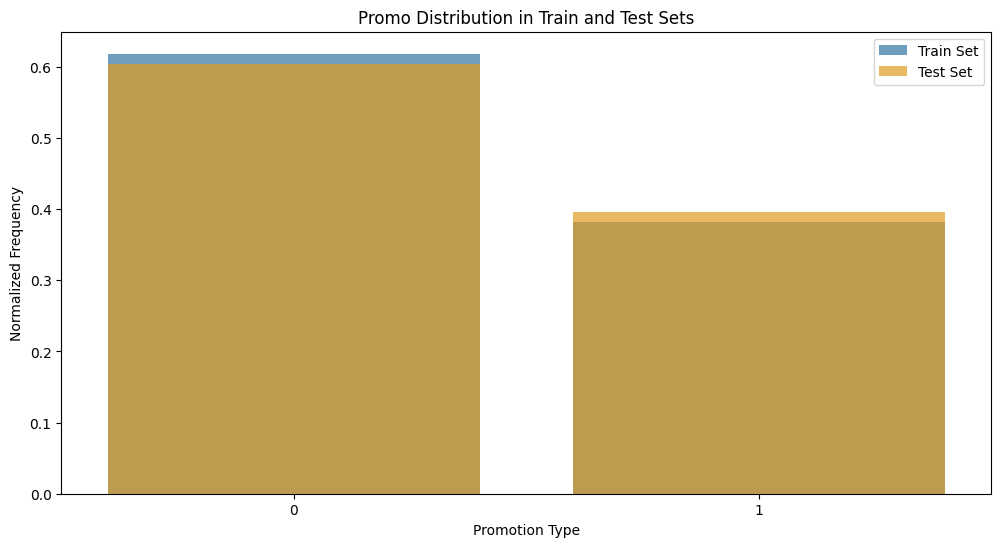


Train Set Promo Distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Test Set Promo Distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64

Mean of Promo in Train Set: 0.38
Median of Promo in Train Set: 0.00

Mean of Promo in Test Set: 0.40
Median of Promo in Test Set: 0.00


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging


train_promo_dist = train_merged['Promo'].value_counts(normalize=True)
test_promo_dist = test_merged['Promo'].value_counts(normalize=True)

logging.info('Promo distribution checked in both training and test datasets.')


plt.figure(figsize=(12,6))  
sns.barplot(x=train_promo_dist.index, y=train_promo_dist.values, alpha=0.7, label='Train Set')
sns.barplot(x=test_promo_dist.index, y=test_promo_dist.values, alpha=0.7, label='Test Set', color='orange')
plt.title('Promo Distribution in Train and Test Sets')
plt.xlabel('Promotion Type')  
plt.ylabel('Normalized Frequency')  
plt.legend()
plt.show()

logging.info('Promo distribution comparison plot created.')

print("\nTrain Set Promo Distribution:")
print(train_promo_dist)
print("\nTest Set Promo Distribution:")
print(test_promo_dist)

train_mean = train_merged['Promo'].mean()
train_median = train_merged['Promo'].median()

test_mean = test_merged['Promo'].mean()
test_median = test_merged['Promo'].median()

print(f"\nMean of Promo in Train Set: {train_mean:.2f}")
print(f"Median of Promo in Train Set: {train_median:.2f}")
print(f"\nMean of Promo in Test Set: {test_mean:.2f}")
print(f"Median of Promo in Test Set: {test_median:.2f}")

logging.info('Additional numerical analysis completed.')


Analyze Sales Before, During, and After Holidays

C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3086826075.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holidays_sales.index, y=holidays_sales.values, palette='Set1')


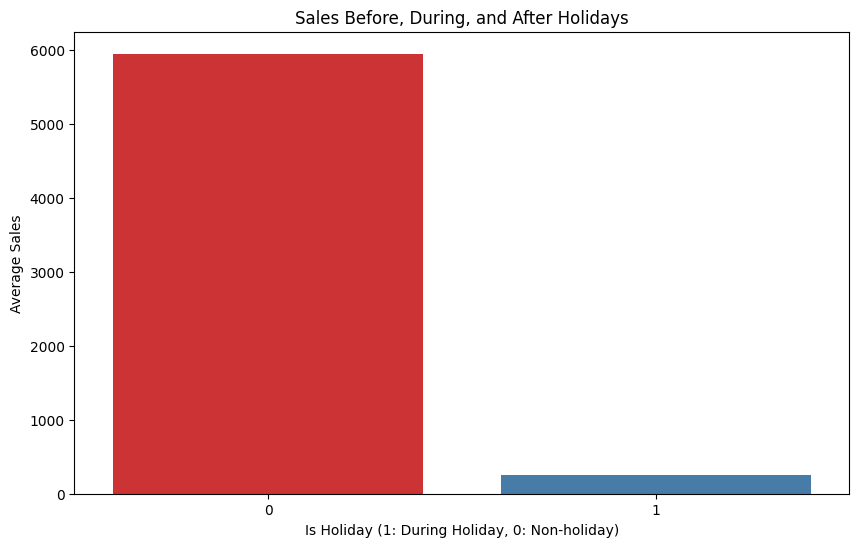

C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3086826075.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_holidays_sales.index, y=school_holidays_sales.values, palette='Set2')


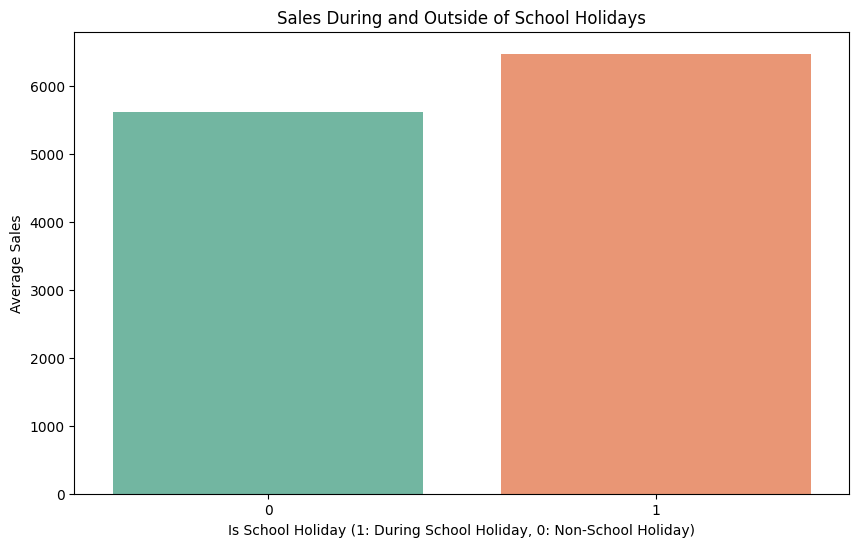


Holidays Sales Analysis:
Total number of rows: 1017209
Number of rows with IsHoliday=1 (during holiday): 31050
Number of rows with IsHoliday=0 (non-holiday): 986159

School Holidays Sales Analysis:
Number of rows with IsSchoolHoliday=1 (during school holiday): 181721
Number of rows with IsSchoolHoliday=0 (non-school holiday): 835488

Sales Statistics:
Mean Sales During Holidays: 3102.8217369386657
Mean Sales Outside Holidays: 5947.48389255688
Standard Deviation of Sales During Holidays: 4022.959800844763
Mean Sales During School Holidays: 6048.7506204649435
Mean Sales Outside School Holidays: 5620.97903381018
Standard Deviation of Sales During School Holidays: 604.9603794450232

Percentage Difference in Sales (Holiday vs Non-Holiday): -95.66%

Percentage Difference in Sales (School Holiday vs Non-School Holiday): 15.22%


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

train_merged['Date'] = pd.to_datetime(train_merged['Date'])

train_merged['IsHoliday'] = train_merged['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)

train_merged['IsSchoolHoliday'] = train_merged['SchoolHoliday'].apply(lambda x: 1 if x == 1 else 0)

holidays_sales = train_merged.groupby('IsHoliday')['Sales'].mean()
school_holidays_sales = train_merged.groupby('IsSchoolHoliday')['Sales'].mean()

logging.info('Sales before, during, and after holidays analyzed.')

plt.figure(figsize=(10,6))
sns.barplot(x=holidays_sales.index, y=holidays_sales.values, palette='Set1')
plt.title('Sales Before, During, and After Holidays')
plt.xlabel('Is Holiday (1: During Holiday, 0: Non-holiday)')
plt.ylabel('Average Sales')
plt.show()

logging.info('Sales behavior around holidays plotted.')


plt.figure(figsize=(10,6))
sns.barplot(x=school_holidays_sales.index, y=school_holidays_sales.values, palette='Set2')
plt.title('Sales During and Outside of School Holidays')
plt.xlabel('Is School Holiday (1: During School Holiday, 0: Non-School Holiday)')
plt.ylabel('Average Sales')
plt.show()

logging.info('Sales behavior around school holidays plotted.')


print("\nHolidays Sales Analysis:")
print("Total number of rows:", len(train_merged))
print("Number of rows with IsHoliday=1 (during holiday):", 
      train_merged[train_merged['IsHoliday'] == 1].shape[0])
print("Number of rows with IsHoliday=0 (non-holiday):", 
      train_merged[train_merged['IsHoliday'] == 0].shape[0])

print("\nSchool Holidays Sales Analysis:")
print("Number of rows with IsSchoolHoliday=1 (during school holiday):", 
      train_merged[train_merged['IsSchoolHoliday'] == 1].shape[0])
print("Number of rows with IsSchoolHoliday=0 (non-school holiday):", 
      train_merged[train_merged['IsSchoolHoliday'] == 0].shape[0])

# sales statistics
print("\nSales Statistics:")
print("Mean Sales During Holidays:", holidays_sales.mean())
print("Mean Sales Outside Holidays:", holidays_sales[0])
print("Standard Deviation of Sales During Holidays:", holidays_sales.std())

print("Mean Sales During School Holidays:", school_holidays_sales.mean())
print("Mean Sales Outside School Holidays:", school_holidays_sales[0])
print("Standard Deviation of Sales During School Holidays:", school_holidays_sales.std())


holiday_mean = holidays_sales[1]  # Sales during holidays
non_holiday_mean = holidays_sales[0]  # Sales outside of holidays
percentage_diff = ((holiday_mean - non_holiday_mean) / non_holiday_mean * 100)

print(f"\nPercentage Difference in Sales (Holiday vs Non-Holiday): {percentage_diff:.2f}%")


school_holiday_mean = school_holidays_sales[1]  # Sales during school holidays
non_school_holiday_mean = school_holidays_sales[0]  # Sales outside school holidays
school_percentage_diff = ((school_holiday_mean - non_school_holiday_mean) / non_school_holiday_mean * 100)

print(f"\nPercentage Difference in Sales (School Holiday vs Non-School Holiday): {school_percentage_diff:.2f}%")

logging.info('Additional numerical analysis for holidays and school holidays completed.')


Find Seasonal Purchase Behavior

C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3745528116.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['December (Christmas)', 'Easter'], y=[december_sales, easter_sales], palette='coolwarm')


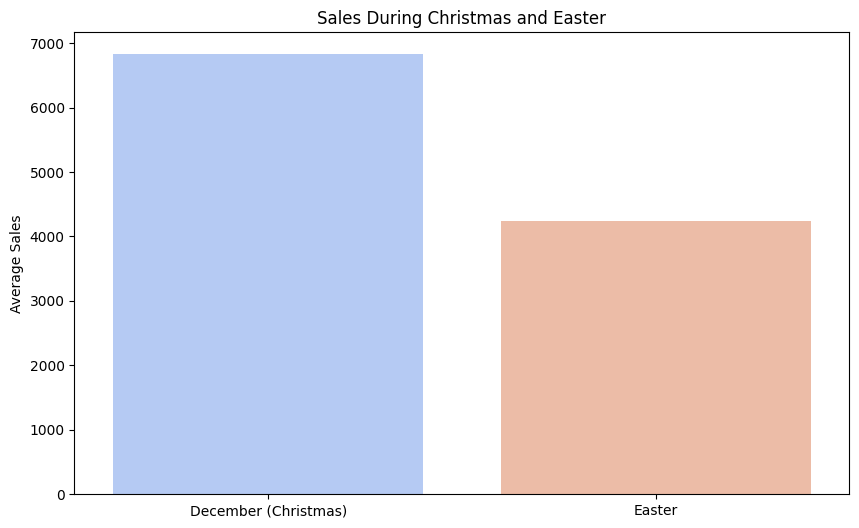

c:\Users\USER\Documents\OPLearning\10_Academy\Week_4\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1017209.
  res = hypotest_fun_out(*samples, **kwds)



Advanced Analysis of Sales Column:

Mean Sales: 5773.82
Median Sales: 5744.00
Standard Deviation of Sales: 3849.93

Skewness: 0.64
Kurtosis: 1.78

Shapiro-Wilk Normality Test Results:
Statistic: 0.9412
P-value: 0.0000

Average Sales Growth Rate: inf%


In [18]:
from scipy import stats
train_merged['Month'] = train_merged['Date'].dt.month

# Analyze sales in December (Christmas) and Easter
december_sales = train_merged[train_merged['Month'] == 12].groupby('Month')['Sales'].mean().values[0]
easter_sales = train_merged[(train_merged['Date'] >= '2015-04-05') & (train_merged['Date'] <= '2015-04-10')]['Sales'].mean()

logging.info('Sales analyzed for December (Christmas) and Easter.')


plt.figure(figsize=(10,6))
sns.barplot(x=['December (Christmas)', 'Easter'], y=[december_sales, easter_sales], palette='coolwarm')
plt.title('Sales During Christmas and Easter')
plt.ylabel('Average Sales')
plt.show()

logging.info('Seasonal behavior plotted for Christmas and Easter.')


print("\nAdvanced Analysis of Sales Column:")
print(f"\nMean Sales: {train_merged['Sales'].mean():.2f}")
print(f"Median Sales: {train_merged['Sales'].median():.2f}")
print(f"Standard Deviation of Sales: {train_merged['Sales'].std():.2f}")


skewness = train_merged['Sales'].skew()
kurtosis = train_merged['Sales'].kurt()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


shapiro_statistic, shapiro_p_value = stats.shapiro(train_merged['Sales'])

print(f"\nShapiro-Wilk Normality Test Results:")
print(f"Statistic: {shapiro_statistic:.4f}")
print(f"P-value: {shapiro_p_value:.4f}")
logging.info('Normality test completed.')

logging.info('Additional statistical analysis completed.')

# Calculate sales growth rate
sales_growth_rate = train_merged['Sales'].pct_change().mean()

print(f"\nAverage Sales Growth Rate: {sales_growth_rate:.2%}")

logging.info('Sales growth rate calculated.')